In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_excel("/content/data (1).xlsx")

In [ ]:
df.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


In [ ]:
df.shape

(4424, 37)

In [ ]:
df.size

163688

In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
df.isna()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

Apllied LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Marital status'] = labelencoder.fit_transform(df['Marital status'])
df['Application mode'] = labelencoder.fit_transform(df['Application mode'])
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,7,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,0,5,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,0,0,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,0,7,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,1,11,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,0,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,0,0,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,0,0,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,0,0,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**DATA**  **PREPROCESSING**

Separating the features and targets

In [ ]:
X = df.drop(columns=['Course','Target'], axis=1)
Y = df['Target']

In [ ]:
print(X)

      Marital status  Application mode  Application order  \
0                  0                 7                  5   
1                  0                 5                  1   
2                  0                 0                  5   
3                  0                 7                  2   
4                  1                11                  1   
...              ...               ...                ...   
4419               0                 0                  6   
4420               0                 0                  2   
4421               0                 0                  1   
4422               0                 0                  1   
4423               0                 4                  1   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1                       1   
2                                1                       1   
3                  

In [ ]:
print(Y)

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object


Splitting the data to training data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(4424, 35) (3539, 35) (885, 35)


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 4.76915307 -0.55245962 -0.55749616 ... -0.17355626 -0.46134859
   0.88478423]
 [-0.29476314  0.96287043 -0.55749616 ... -0.17355626 -0.46134859
   0.88478423]
 [-0.29476314 -1.12070839  3.23669405 ... -0.28596761  0.11873318
   0.76159704]
 ...
 [-0.29476314 -1.12070839 -0.55749616 ...  0.42597092  1.7864683
  -0.75184569]
 [-0.29476314 -1.12070839  1.71901797 ... -0.17355626 -0.46134859
   0.88478423]
 [-0.29476314  0.39462166  0.20134188 ...  0.87561631 -1.1139406
   0.34364047]]


Model Training

Support Vector Machine Model

In [ ]:
svm_model = svm.SVC(kernel='linear')

In [ ]:
# training the SVM model with training data
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on training data
svm_train_prediction = svm_model.predict(x_train)
svm_test_prediction = svm_model.predict(x_test)
print("Predictions using SVM model:")
print(svm_test_prediction)

Predictions using SVM model:
['Dropout' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Enrolled'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Enrolled' 'Graduate'
 'Dropout' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Dropout' 'Graduate' 'Graduate' 'Dropout' 'Dropout' 'Graduate' 'Graduate'
 'Graduate' 'Dropout' 'Dropout' 'Enrolled' 'Dropout' 'Enrolled' 'Dropout'
 'Enrolled' 'Dropout' 'Dropout' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Enrolled' 'Dropout' 'Dropout' 'Enrolled' 'Dropout' 'Dropout'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Dropout' 'Dropout' 'Enrolled' 'Dropout' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Dropout'
 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Dropout'
 'Graduate' 'Dropout' 'Graduate' 'Enrolled' 'Graduate' 'Graduate'
 'Graduate' '

In [ ]:
svm_training_accuracy = accuracy_score(Y_train, svm_train_prediction)
svm_testing_accuracy = accuracy_score(Y_test, svm_test_prediction)


In [ ]:
print('SVM Model:')
print('Accuracy score on training data: {:.2f}%'.format(svm_training_accuracy * 100))
print('Accuracy score on test data: {:.2f}%'.format(svm_testing_accuracy * 100))

SVM Model:
Accuracy score on training data: 78.19%
Accuracy score on test data: 75.14%


Naiev Bayes


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(3539, 885, 3539, 885)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
gnb_train_prediction = gnb_model.predict(x_train)
gnb_test_prediction = gnb_model.predict(x_test)
print("Predictions using gnb model:")
print(gnb_test_prediction)

Predictions using gnb model:
['Dropout' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Enrolled'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Graduate'
 'Enrolled' 'Graduate' 'Graduate' 'Dropout' 'Dropout' 'Enrolled'
 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Dropout'
 'Graduate' 'Dropout' 'Graduate' 'Dropout' 'Dropout' 'Graduate' 'Graduate'
 'Enrolled' 'Graduate' 'Enrolled' 'Dropout' 'Enrolled' 'Graduate'
 'Dropout' 'Dropout' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Enrolled' 'Graduate' 'Dropout' 'Enrolled' 'Enrolled'
 'Dropout' 'Enrolled' 'Enrolled' 'Graduate' 'Graduate' 'Dropout'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Dropout'
 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Dropout' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate

In [ ]:
gnb_training_accuracy = accuracy_score(y_train, gnb_train_prediction)
gnb_testing_accuracy = accuracy_score(y_test, gnb_test_prediction)

In [ ]:
print('\nGaussian Naive Bayes Model:')
print('Accuracy score on training data: {:.2f}%'.format(gnb_training_accuracy * 100))
print('Accuracy score on test data: {:.2f}%'.format(gnb_testing_accuracy * 100))


Gaussian Naive Bayes Model:
Accuracy score on training data: 69.51%
Accuracy score on test data: 69.72%


**SMOTE**

In [ ]:
df2=pd.read_excel('/content/data (1).xlsx')


In [ ]:
dsmote=df2.copy()
numerical_features=['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP',"Target"]
dummy=pd.get_dummies(dsmote,drop_first=True)


In [ ]:
dummy.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
dummy.shape
Ysmote=dummy['Target_Enrolled']
Xsmote=dummy.drop(columns=['Target_Enrolled'])
Xsmote
from sklearn.model_selection import train_test_split
xs_train,xs_test,ys_train,ys_test=train_test_split(Xsmote,Ysmote,test_size=0.25,random_state=0)
len(xs_train),len(xs_test),len(ys_train),len(ys_test)
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_new,y_train_new=sm.fit_resample(xs_train,ys_train)
ys_train.value_counts()

0    2717
1     601
Name: Target_Enrolled, dtype: int64

In [ ]:
dsmote.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
y_train_new.value_counts()

0    2717
1    2717
Name: Target_Enrolled, dtype: int64

In [ ]:
svm_model = svm.SVC(kernel='linear')

In [ ]:
# training the SVM model with training data
svm_model.fit(x_train_new,y_train_new)

SVC(kernel='linear')

In [ ]:
svm_train_prediction = svm_model.predict(xs_train)
svm_test_prediction = svm_model.predict(xs_test)


In [ ]:
svm_training_accuracy_after_smote = accuracy_score(ys_train, svm_train_prediction)
svm_testing_accuracy_after_smote = accuracy_score(ys_test, svm_test_prediction)

print('SVM Model after SMOTE:')
print('Accuracy score on training data: {:.2f}%'.format(svm_training_accuracy_after_smote * 100))
print('Accuracy score on test data: {:.2f}%'.format(svm_testing_accuracy_after_smote * 100))

SVM Model after SMOTE:
Accuracy score on training data: 85.50%
Accuracy score on test data: 85.35%


Naiev Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [ ]:
gnb_model_after_smote = GaussianNB()
gnb_model_after_smote.fit(xs_train, ys_train)


GaussianNB()

In [ ]:
gnb_train_prediction_after_smote = gnb_model_after_smote.predict(xs_train)
gnb_test_prediction_after_smote = gnb_model_after_smote.predict(xs_test)
print("Predictions :")
print(gnb_test_prediction_after_smote)

Predictions :
[0 0 0 ... 1 0 0]


In [ ]:
gnb_training_accuracy_after_smote = accuracy_score(ys_train, gnb_train_prediction_after_smote)
gnb_testing_accuracy_after_smote = accuracy_score(ys_test, gnb_test_prediction_after_smote)


In [ ]:
print('\nGaussian Naive Bayes Model after SMOTE:')
print('Accuracy score on training data: {:.2f}%'.format(gnb_training_accuracy_after_smote * 100))
print('Accuracy score on test data: {:.2f}%'.format(gnb_testing_accuracy_after_smote * 100))


Gaussian Naive Bayes Model after SMOTE:
Accuracy score on training data: 85.35%
Accuracy score on test data: 85.08%


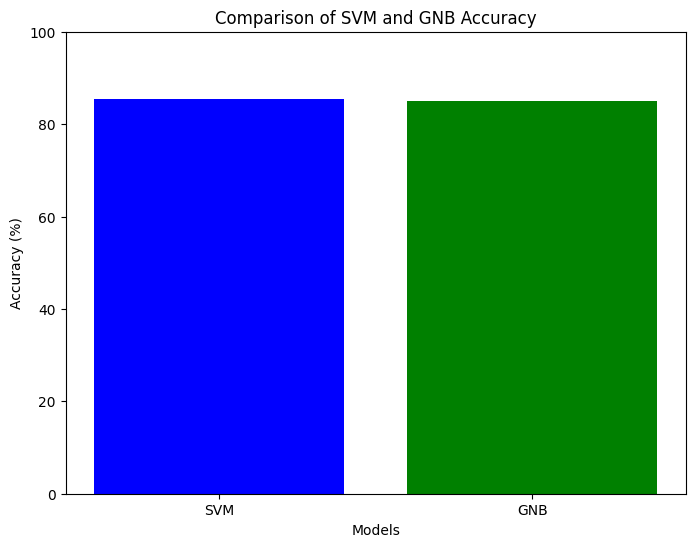

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained and evaluated both SVM and GNB models

# Define the models and their respective accuracy scores
models = ['SVM', 'GNB']
accuracy_scores = [svm_testing_accuracy_after_smote * 100, gnb_testing_accuracy_after_smote * 100]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of SVM and GNB Accuracy')
plt.ylim(0, 100)

# Display the bar chart
plt.show()


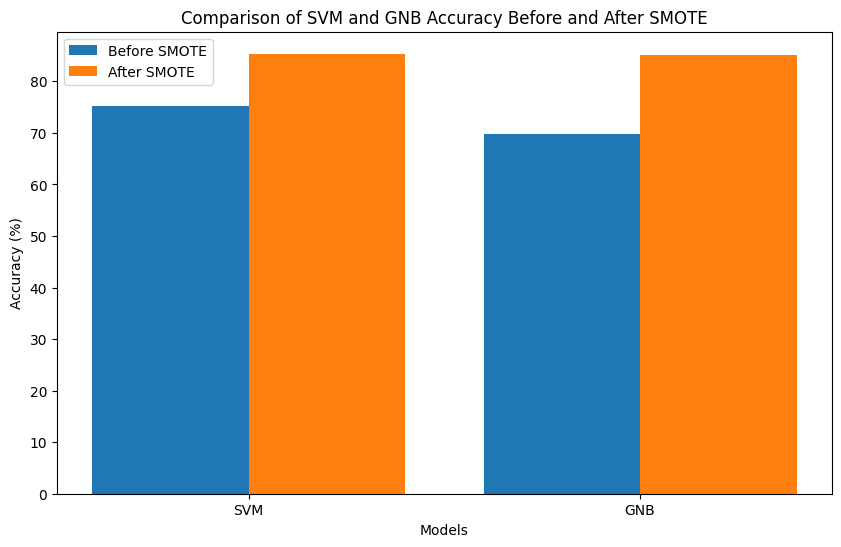

In [ ]:


# Assuming you have accuracy scores for SVM and GNB before and after SMOTE
svm_accuracy_before_smote = 75.14 # Insert accuracy score for SVM before SMOTE
gnb_accuracy_before_smote = 69.72 # Insert accuracy score for GNB before SMOTE
svm_accuracy_after_smote = 85.35 # Insert accuracy score for SVM after SMOTE
gnb_accuracy_after_smote = 85.08 # Insert accuracy score for GNB after SMOTE

# Define the model names and their respective accuracy scores
models = ['SVM', 'GNB']
accuracy_before_smote = [svm_accuracy_before_smote, gnb_accuracy_before_smote]
accuracy_after_smote = [svm_accuracy_after_smote, gnb_accuracy_after_smote]

# Set the positions for the bars
x = range(len(models))

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.4

plt.bar(x, accuracy_before_smote, width=bar_width, label='Before SMOTE', align='center')
plt.bar([i + bar_width for i in x], accuracy_after_smote, width=bar_width, label='After SMOTE', align='center')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of SVM and GNB Accuracy Before and After SMOTE')
plt.xticks([i + bar_width/2 for i in x], models)
plt.legend()

# Display the bar chart
plt.show()


In [ ]:
from sklearn.metrics import classification_report



# Generate classification reports for SVM
svm_report = classification_report(ys_test, svm_test_prediction)



# Print classification reports
print("Classification Report for SVM:")
print(svm_report)



Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       913
           1       0.55      0.90      0.68       193

    accuracy                           0.85      1106
   macro avg       0.76      0.87      0.79      1106
weighted avg       0.90      0.85      0.87      1106



In [ ]:
gnb_report = classification_report(ys_test, gnb_test_prediction_after_smote)
print("\nClassification Report for Gaussian Naive Bayes:")
print(gnb_report)


Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       913
           1       0.55      0.78      0.65       193

    accuracy                           0.85      1106
   macro avg       0.75      0.82      0.78      1106
weighted avg       0.88      0.85      0.86      1106



In [ ]:

# Make predictions using SVM model
svm_predictions = svm_model.predict(x_test)

# Make predictions using GNB model
gnb_predictions = gnb_model.predict(x_test)

# Print the predictions
print("Predictions using SVM model:")
print(svm_predictions)

print("\nPredictions using Gaussian Naive Bayes model:")
print(gnb_predictions)


Predictions using SVM model:
['Dropout' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Enrolled'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Enrolled' 'Graduate'
 'Dropout' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Dropout' 'Graduate' 'Graduate' 'Dropout' 'Dropout' 'Graduate' 'Graduate'
 'Graduate' 'Dropout' 'Dropout' 'Enrolled' 'Dropout' 'Enrolled' 'Dropout'
 'Enrolled' 'Dropout' 'Dropout' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Enrolled' 'Dropout' 'Dropout' 'Enrolled' 'Dropout' 'Dropout'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Dropout' 'Dropout' 'Enrolled' 'Dropout' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Dropout'
 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Dropout'
 'Graduate' 'Dropout' 'Graduate' 'Enrolled' 'Graduate' 'Graduate'
 'Graduate' '